In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
df.drop(['address','url','phone','dish_liked'],axis=1,inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
def numOfmenu(menu):
    try:
        return len(menu.split(","))
    except:
        return 0

In [21]:
df['NumOfMenu'] = df['menu_item'].apply(numOfmenu)

In [22]:
df['menu_item'][15]

'[]'

In [23]:
df['NumOfMenu'].value_counts()

1      39575
61        98
54        95
25        95
32        93
       ...  
618        1
417        1
297        1
290        1
573        1
Name: NumOfMenu, Length: 458, dtype: int64

In [30]:
Allcuisines = df['cuisines'].unique().tolist()

In [31]:
Allcuisines

['North Indian, Mughlai, Chinese',
 'Chinese, North Indian, Thai',
 'Cafe, Mexican, Italian',
 'South Indian, North Indian',
 'North Indian, Rajasthani',
 'North Indian',
 'North Indian, South Indian, Andhra, Chinese',
 'Pizza, Cafe, Italian',
 'Cafe, Italian, Continental',
 'Cafe, Mexican, Italian, Momos, Beverages',
 'Cafe',
 'Cafe, Chinese, Continental, Italian',
 'Cafe, Continental',
 'Cafe, Fast Food, Continental, Chinese, Momos',
 'Chinese, Cafe, Italian',
 'Cafe, Italian, American',
 'Cafe, French, North Indian',
 'Cafe, Pizza, Fast Food, Beverages',
 'Cafe, Fast Food',
 'Italian, Fast Food, Cafe, European',
 'Cafe, Bakery',
 'Cafe, South Indian',
 'Cafe, Fast Food, Beverages',
 'North Indian, Cafe, Chinese, Fast Food',
 'Cafe, Italian',
 'North Indian, Fast Food, Chinese, Burger',
 'Bakery, Desserts',
 'Pizza',
 'North Indian, Biryani, Fast Food',
 'Biryani',
 'North Indian, Chinese, Fast Food',
 'Chinese, Thai, Momos',
 'North Indian, Mughlai, South Indian, Chinese',
 'South I

In [26]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
NumOfMenu                      0
dtype: int64

In [32]:
AllcuisinesT = [(i).split(",") for i in Allcuisines]
AllcuisinesT

[['North Indian', ' Mughlai', ' Chinese'],
 ['Chinese', ' North Indian', ' Thai'],
 ['Cafe', ' Mexican', ' Italian'],
 ['South Indian', ' North Indian'],
 ['North Indian', ' Rajasthani'],
 ['North Indian'],
 ['North Indian', ' South Indian', ' Andhra', ' Chinese'],
 ['Pizza', ' Cafe', ' Italian'],
 ['Cafe', ' Italian', ' Continental'],
 ['Cafe', ' Mexican', ' Italian', ' Momos', ' Beverages'],
 ['Cafe'],
 ['Cafe', ' Chinese', ' Continental', ' Italian'],
 ['Cafe', ' Continental'],
 ['Cafe', ' Fast Food', ' Continental', ' Chinese', ' Momos'],
 ['Chinese', ' Cafe', ' Italian'],
 ['Cafe', ' Italian', ' American'],
 ['Cafe', ' French', ' North Indian'],
 ['Cafe', ' Pizza', ' Fast Food', ' Beverages'],
 ['Cafe', ' Fast Food'],
 ['Italian', ' Fast Food', ' Cafe', ' European'],
 ['Cafe', ' Bakery'],
 ['Cafe', ' South Indian'],
 ['Cafe', ' Fast Food', ' Beverages'],
 ['North Indian', ' Cafe', ' Chinese', ' Fast Food'],
 ['Cafe', ' Italian'],
 ['North Indian', ' Fast Food', ' Chinese', ' Burge

In [33]:
cuisineslist = sum(AllcuisinesT, [])
cuisineslist

['North Indian',
 ' Mughlai',
 ' Chinese',
 'Chinese',
 ' North Indian',
 ' Thai',
 'Cafe',
 ' Mexican',
 ' Italian',
 'South Indian',
 ' North Indian',
 'North Indian',
 ' Rajasthani',
 'North Indian',
 'North Indian',
 ' South Indian',
 ' Andhra',
 ' Chinese',
 'Pizza',
 ' Cafe',
 ' Italian',
 'Cafe',
 ' Italian',
 ' Continental',
 'Cafe',
 ' Mexican',
 ' Italian',
 ' Momos',
 ' Beverages',
 'Cafe',
 'Cafe',
 ' Chinese',
 ' Continental',
 ' Italian',
 'Cafe',
 ' Continental',
 'Cafe',
 ' Fast Food',
 ' Continental',
 ' Chinese',
 ' Momos',
 'Chinese',
 ' Cafe',
 ' Italian',
 'Cafe',
 ' Italian',
 ' American',
 'Cafe',
 ' French',
 ' North Indian',
 'Cafe',
 ' Pizza',
 ' Fast Food',
 ' Beverages',
 'Cafe',
 ' Fast Food',
 'Italian',
 ' Fast Food',
 ' Cafe',
 ' European',
 'Cafe',
 ' Bakery',
 'Cafe',
 ' South Indian',
 'Cafe',
 ' Fast Food',
 ' Beverages',
 'North Indian',
 ' Cafe',
 ' Chinese',
 ' Fast Food',
 'Cafe',
 ' Italian',
 'North Indian',
 ' Fast Food',
 ' Chinese',
 ' Burge

In [34]:
cuisinestypes = [(i).lower().strip() for i in cuisineslist]
cuisinestypes

['north indian',
 'mughlai',
 'chinese',
 'chinese',
 'north indian',
 'thai',
 'cafe',
 'mexican',
 'italian',
 'south indian',
 'north indian',
 'north indian',
 'rajasthani',
 'north indian',
 'north indian',
 'south indian',
 'andhra',
 'chinese',
 'pizza',
 'cafe',
 'italian',
 'cafe',
 'italian',
 'continental',
 'cafe',
 'mexican',
 'italian',
 'momos',
 'beverages',
 'cafe',
 'cafe',
 'chinese',
 'continental',
 'italian',
 'cafe',
 'continental',
 'cafe',
 'fast food',
 'continental',
 'chinese',
 'momos',
 'chinese',
 'cafe',
 'italian',
 'cafe',
 'italian',
 'american',
 'cafe',
 'french',
 'north indian',
 'cafe',
 'pizza',
 'fast food',
 'beverages',
 'cafe',
 'fast food',
 'italian',
 'fast food',
 'cafe',
 'european',
 'cafe',
 'bakery',
 'cafe',
 'south indian',
 'cafe',
 'fast food',
 'beverages',
 'north indian',
 'cafe',
 'chinese',
 'fast food',
 'cafe',
 'italian',
 'north indian',
 'fast food',
 'chinese',
 'burger',
 'bakery',
 'desserts',
 'pizza',
 'north india

In [35]:
S = set(cuisinestypes) 

In [36]:
for cuisine in S:
    df[cuisine] = df['cuisines'].apply(lambda x : 1 if cuisine in x.lower() else 0)

C:\Users\Mostafa Hesham\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [37]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),NumOfMenu,raw meats,healthy food,bihari,bubble tea,continental,coffee,south american,bbq,indian,american,arabian,jewish,bohri,malaysian,rolls,north eastern,kerala,south indian,korean,finger food,mexican,nepalese,afghan,wraps,juices,awadhi,seafood,german,drinks only,japanese,tex-mex,mangalorean,middle eastern,oriya,salad,hot dogs,bakery,tamil,lucknowi,tibetan,sindhi,indonesian,mongolian,ice cream,russian,andhra,goan,steak,belgian,pan asian,hyderabadi,lebanese,rajasthani,european,burger,street food,kashmiri,bar food,burmese,portuguese,sri lankan,fast food,north indian,desserts,kebab,australian,pizza,charcoal chicken,tea,konkan,assamese,iranian,spanish,cafe,biryani,sandwich,afghani,modern indian,italian,sushi,momos,vietnamese,naga,british,mithai,singaporean,beverages,french,greek,asian,bengali,chettinad,gujarati,mediterranean,cantonese,roast chicken,african,grill,paan,chinese,turkish,thai,parsi,maharashtrian,mughlai,vegan
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
pd.set_option('display.max_columns',None)
df['name'].value_counts()[:100]

Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Kanti Sweets                  68
                              ..
Shanmukha                     32
Third Wave Coffee Roasters    32
Imperial Restaurant           31
Sagar Fast Food               31
Wangs Kitchen                 31
Name: name, Length: 100, dtype: int64

In [39]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [40]:
df.drop(['listed_in(city)'],axis=1,inplace=True)

In [41]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [42]:
df['reviews_list'][5].strip()

"[('Rated 3.0', 'RATED\\n  Food 3/5\\nAmbience 3/5\\nService 3/5\\n\\nHad been here for family lunch. This place serves buffets too. We ordered soups, babycorn starters, butter naan, kadai panner, veg kohlapuri, pease pulav. Food was good. But the service is too slow. They will make you wait for 20 mins to get the order. This place is apt for family hangout.\\n\\nCheers.')]"

In [43]:
df.shape

(43486, 119)

In [44]:
df['cuisines'].value_counts()

North Indian                                                           2241
North Indian, Chinese                                                  2029
South Indian                                                           1317
Bakery, Desserts                                                        642
Biryani                                                                 632
                                                                       ... 
Chinese, Bakery                                                           1
South Indian, Fast Food, Chinese                                          1
Asian, Continental, Healthy Food                                          1
South Indian, North Indian, Chinese, Desserts, Fast Food, Ice Cream       1
North Indian, Chinese, Arabian, Momos                                     1
Name: cuisines, Length: 2487, dtype: int64

In [45]:
indexes = df[ df['rate'] == 'NEW'].index

In [46]:
indexes2 = df[ df['rate'] == '-'].index

In [47]:
df.drop(indexes,axis = 0,inplace=True)

In [48]:
df.drop(indexes2,axis = 0,inplace=True)

In [49]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [50]:
def rating(row):
    return float(row.split('/')[0])

In [51]:
rating('3.8/5')

3.8

In [52]:
df['rate'] = df['rate'].apply(rating)

In [53]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),NumOfMenu,raw meats,healthy food,bihari,bubble tea,continental,coffee,south american,bbq,indian,american,arabian,jewish,bohri,malaysian,rolls,north eastern,kerala,south indian,korean,finger food,mexican,nepalese,afghan,wraps,juices,awadhi,seafood,german,drinks only,japanese,tex-mex,mangalorean,middle eastern,oriya,salad,hot dogs,bakery,tamil,lucknowi,tibetan,sindhi,indonesian,mongolian,ice cream,russian,andhra,goan,steak,belgian,pan asian,hyderabadi,lebanese,rajasthani,european,burger,street food,kashmiri,bar food,burmese,portuguese,sri lankan,fast food,north indian,desserts,kebab,australian,pizza,charcoal chicken,tea,konkan,assamese,iranian,spanish,cafe,biryani,sandwich,afghani,modern indian,italian,sushi,momos,vietnamese,naga,british,mithai,singaporean,beverages,french,greek,asian,bengali,chettinad,gujarati,mediterranean,cantonese,roast chicken,african,grill,paan,chinese,turkish,thai,parsi,maharashtrian,mughlai,vegan
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,

In [54]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [56]:
def change(row):
    if row == "Yes":
        return 1
    else:
        return 0

In [57]:
df['book_table'] = df['book_table'].apply(change)

In [58]:
df['online_order'] = df['online_order'].apply(change)

In [59]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),NumOfMenu,raw meats,healthy food,bihari,bubble tea,continental,coffee,south american,bbq,indian,american,arabian,jewish,bohri,malaysian,rolls,north eastern,kerala,south indian,korean,finger food,mexican,nepalese,afghan,wraps,juices,awadhi,seafood,german,drinks only,japanese,tex-mex,mangalorean,middle eastern,oriya,salad,hot dogs,bakery,tamil,lucknowi,tibetan,sindhi,indonesian,mongolian,ice cream,russian,andhra,goan,steak,belgian,pan asian,hyderabadi,lebanese,rajasthani,european,burger,street food,kashmiri,bar food,burmese,portuguese,sri lankan,fast food,north indian,desserts,kebab,australian,pizza,charcoal chicken,tea,konkan,assamese,iranian,spanish,cafe,biryani,sandwich,afghani,modern indian,italian,sushi,momos,vietnamese,naga,british,mithai,singaporean,beverages,french,greek,asian,bengali,chettinad,gujarati,mediterranean,cantonese,roast chicken,african,grill,paan,chinese,turkish,thai,parsi,maharashtrian,mughlai,vegan
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Timepass Dinner,1,0,3.8,286,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,Onesta,1,1,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [60]:
def rating(value):
    if value >= 3.7 :
        return 1
    else :
        return 0

In [61]:
df['rate'] = df['rate'].apply(rating)

In [62]:
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)

In [63]:
Allreview = ' '.join(df['reviews_list'].tolist())
Allreview = ' '.join([(i).lower() for i in Allreview.split()])
len(Allreview)

482698731

In [64]:
MostRepeatedWords = {}

for Word in Allreview.split() : 
    if Word in MostRepeatedWords.keys() : 
        MostRepeatedWords[Word] +=1
    else : 
        MostRepeatedWords[Word] =1
MostRepeatedWords

{"[('rated": 40116,
 "4.0',": 397332,
 "'rated\\n": 939673,
 'a': 1591238,
 'beautiful': 26153,
 'place': 773775,
 'to': 1357213,
 'dine': 10197,
 'in.the': 19,
 'interiors': 11579,
 'take': 38850,
 'you': 405788,
 'back': 48696,
 'the': 3276275,
 'mughal': 784,
 'era.': 101,
 'lightings': 454,
 'are': 401060,
 'just': 189990,
 'perfect.we': 9,
 'went': 87973,
 'there': 166974,
 'on': 409286,
 'occasion': 2263,
 'of': 1021722,
 'christmas': 3234,
 'and': 2460684,
 'so': 248554,
 'they': 429078,
 'had': 352029,
 'only': 106071,
 'limited': 13668,
 'items': 51076,
 'available.': 6997,
 'but': 438876,
 'taste': 187104,
 'service': 231029,
 'was': 1402492,
 'not': 429982,
 'compromised': 652,
 'at': 223665,
 'all.the': 124,
 'complaint': 2244,
 'is': 1341229,
 'that': 310029,
 'breads': 4432,
 'could': 59694,
 'have': 437758,
 'been': 125121,
 'better.would': 9,
 'surely': 15183,
 'like': 192366,
 'come': 41269,
 'here': 183053,
 "again.'),": 11241,
 "('rated": 1255686,
 'i': 909518,
 'for

In [65]:
MostRepeatedWords=  {k:v for k,v in sorted(MostRepeatedWords.items(),key = lambda item: item[1],reverse = True) }
MostRepeatedWords

{'the': 3276275,
 'and': 2460684,
 'a': 1591238,
 'was': 1402492,
 'to': 1357213,
 'is': 1341229,
 "('rated": 1255686,
 'of': 1021722,
 "'rated\\n": 939673,
 'i': 909518,
 'for': 889669,
 'place': 773775,
 'with': 726091,
 'in': 716957,
 'it': 655784,
 'food': 639631,
 'this': 634897,
 'good': 610199,
 'we': 448943,
 'very': 443566,
 'but': 438876,
 'have': 437758,
 'not': 429982,
 'they': 429078,
 'on': 409286,
 'you': 405788,
 'are': 401060,
 "4.0',": 397332,
 "5.0',": 372396,
 '"rated\\n': 353908,
 'had': 352029,
 'chicken': 342461,
 'were': 331004,
 'that': 310029,
 'as': 306277,
 'my': 285162,
 'ordered': 284839,
 'their': 263120,
 'which': 249648,
 'so': 248554,
 'really': 244181,
 'one': 232720,
 'service': 231029,
 'at': 223665,
 'all': 219619,
 'be': 216855,
 'from': 208586,
 'great': 206590,
 'also': 206004,
 '-': 198898,
 'like': 192366,
 'just': 189990,
 'taste': 187104,
 'here': 183053,
 'ambience': 180127,
 "3.0',": 178102,
 'try': 174811,
 'there': 166974,
 'if': 166343,

In [66]:
ImportantWords = ['good','great','nice','nice','good.','amazing','loved','love','quite','recommend','decent','perfect','delicious']

In [67]:
for Word in ImportantWords : 
    df[f'Repeated Word : {Word}'] = df['reviews_list'].apply(lambda x : 1 if Word in x.lower() else 0)

In [68]:
df['num of cuisines'] = df['cuisines'].apply( lambda x : len(x.split(',')))

In [69]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),NumOfMenu,raw meats,healthy food,bihari,bubble tea,continental,coffee,south american,bbq,indian,american,arabian,jewish,bohri,malaysian,rolls,north eastern,kerala,south indian,korean,finger food,mexican,nepalese,afghan,wraps,juices,awadhi,seafood,german,drinks only,japanese,tex-mex,mangalorean,middle eastern,oriya,salad,hot dogs,bakery,tamil,lucknowi,tibetan,sindhi,indonesian,mongolian,ice cream,russian,andhra,goan,steak,belgian,pan asian,hyderabadi,lebanese,rajasthani,european,burger,street food,kashmiri,bar food,burmese,portuguese,sri lankan,fast food,north indian,desserts,kebab,australian,pizza,charcoal chicken,tea,konkan,assamese,iranian,spanish,cafe,biryani,sandwich,afghani,modern indian,italian,sushi,momos,vietnamese,naga,british,mithai,singaporean,beverages,french,greek,asian,bengali,chettinad,gujarati,mediterranean,cantonese,roast chicken,african,grill,paan,chinese,turkish,thai,parsi,maharashtrian,mughlai,vegan,Repeated Word : good,Repeated Word : great,Repeated Word : nice,Repeated Word : good.,Repeated Word : amazing,Repeated Word : loved,Repeated Word : love,Repeated Word : quite,Repeated Word : recommend,Repeated Word : decent,Repeated Word : perfect,Repeated Word : delicious,num of cuisines
0,Jalsa,1,1,1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,1,0,3
1,Spice Elephant,1,0,1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,3
2,San Churro Cafe,1,0,1,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,3
3,Addhuri Udupi Bhojana,0,0,1,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,2
4,Grand Village,0,0,1,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41221,The Farm House Bar n Grill,0,0,1,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs 

In [70]:
df.drop(['menu_item','reviews_list'],inplace=True,axis=1)

In [71]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [72]:
df['approx_cost'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost'] = df['approx_cost'].astype(float)

In [73]:
df.drop('approx_cost(for two people)',inplace=True,axis=1)

In [86]:
df.drop('cuisines',inplace=True,axis=1)

In [87]:
df

,name,online_order,book_table,rate,votes,location,rest_type,listed_in(type),NumOfMenu,raw meats,healthy food,bihari,bubble tea,continental,coffee,south american,bbq,indian,american,arabian,jewish,bohri,malaysian,rolls,north eastern,kerala,south indian,korean,finger food,mexican,nepalese,afghan,wraps,juices,awadhi,seafood,german,drinks only,japanese,tex-mex,mangalorean,middle eastern,oriya,salad,hot dogs,bakery,tamil,lucknowi,tibetan,sindhi,indonesian,mongolian,ice cream,russian,andhra,goan,steak,belgian,pan asian,hyderabadi,lebanese,rajasthani,european,burger,street food,kashmiri,bar food,burmese,portuguese,sri lankan,fast food,north indian,desserts,kebab,australian,pizza,charcoal chicken,tea,konkan,assamese,iranian,spanish,cafe,biryani,sandwich,afghani,modern indian,italian,sushi,momos,vietnamese,naga,british,mithai,singaporean,beverages,french,greek,asian,bengali,chettinad,gujarati,mediterranean,cantonese,roast chicken,african,grill,paan,chinese,turkish,thai,parsi,maharashtrian,mughlai,vegan,Repeated Word : good,Repeated Word : great,Repeated Word : nice,Repeated Word : good.,Repeated Word : amazing,Repeated Word : loved,Repeated Word : love,Repeated Word : quite,Repeated Word : recommend,Repeated Word : decent,Repeated Word : perfect,Repeated Word : delicious,num of cuisines,approx_cost
0,Jalsa,1,1,1,775,Banashankari,Casual Dining,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,1,0,3,800.0
1,Spice Elephant,1,0,1,787,Banashankari,Casual Dining,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,3,800.0
2,San Churro Cafe,1,0,1,918,Banashankari,"Cafe, Casual Dining",Buffet,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,3,800.0
3,Addhuri Udupi Bhojana,0,0,1,88,Banashankari,Quick Bites,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,2,300.0
4,Grand Village,0,0,1,166,Basavanagudi,Casual Dining,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41221,The Farm House Bar n Grill,0,0,1,34,Whitefield,"Casual Dining, Bar",Pubs and bars,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,800.0
41222,Bhagini,0,0,0,81,Whitefield,"Casual Dining, Bar",Pubs and bars,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,

## Visualization

In [75]:
sns.set(rc={'figure.figsize': [12, 18]}, font_scale=1.2)

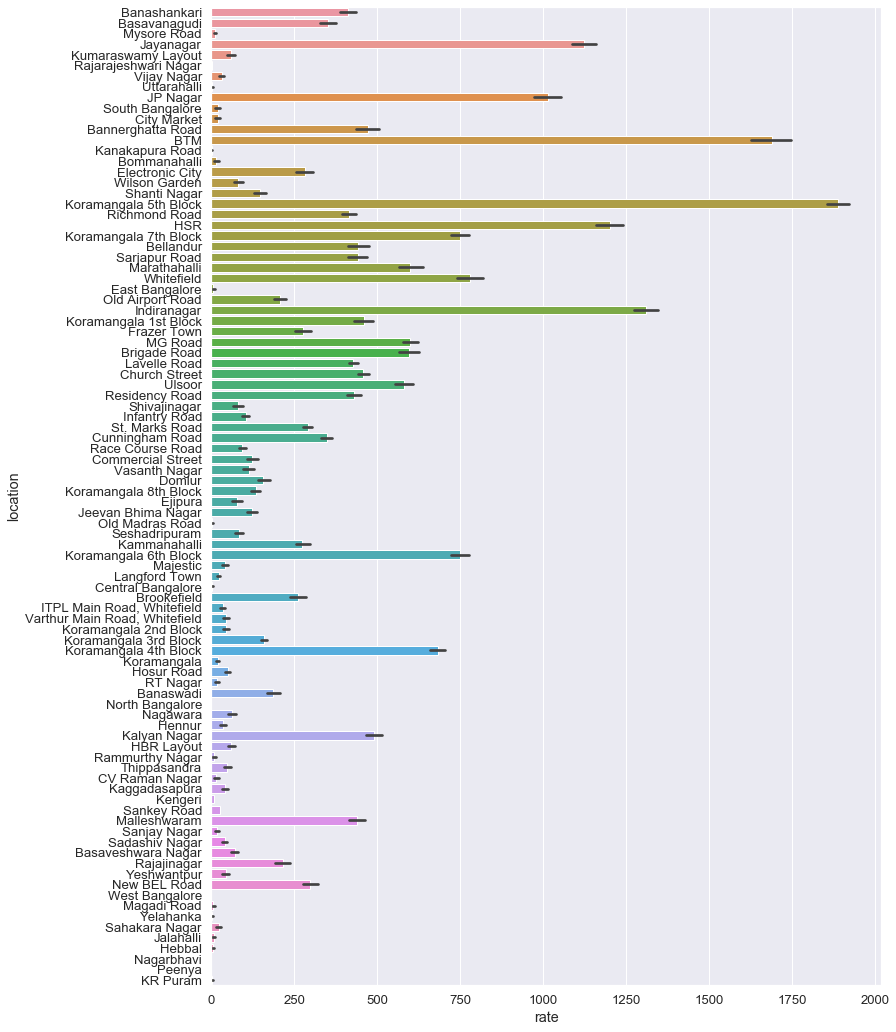

In [76]:
sns.barplot(x='rate' , y='location',data=df, estimator=np.sum)

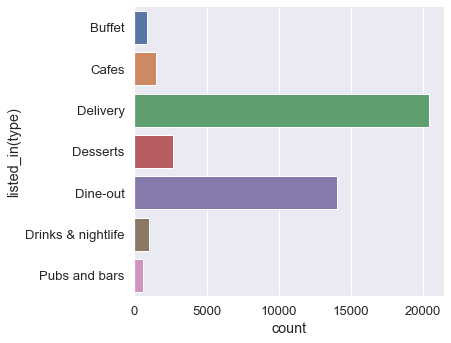

In [77]:
sns.catplot(y="listed_in(type)", data=df, aspect=1.3, kind="count")

In [78]:
data = df

In [79]:
def CPlot(feature) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),
                  linewidth=5,edgecolor=sns.color_palette("dark", 3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

def KPlot(feature,Limit=0) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    if Limit == 0 : 
        sns.kdeplot(data[feature], shade=True)
    else : 
        Data = data[data[feature]<=Limit]
        sns.kdeplot(Data[feature], shade=True)

def BPlot(feature1,feature2 = None,hue = None) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
        
def JPlot(feature1,feature2,Type = 'scatter') : 
    global data
    sns.jointplot(data=data, x=feature1, y=feature2, kind=Type)   
    
    
def Pie(feature,Limit=20) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()     
    

    
def SelectedApprovedPie(feature,Limit=10) : 
    global data
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,2,1)
    plt.title('Approved')
    Data = data[data['rate']== 1]
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    Data = data[data['rate']== 0]
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
    plt.show()        
    


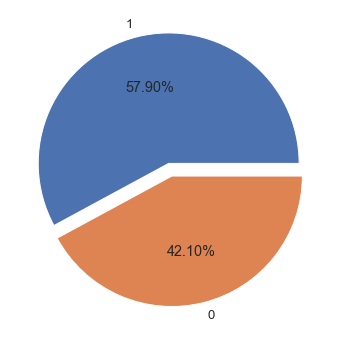

In [80]:
Pie('rate')

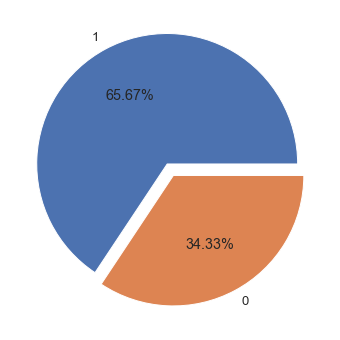

In [81]:
Pie('online_order')

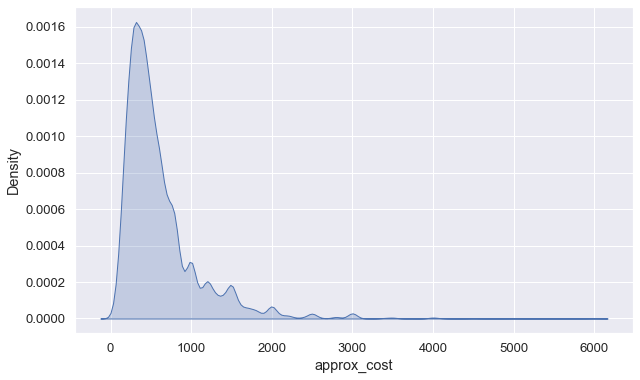

In [82]:
KPlot('approx_cost')

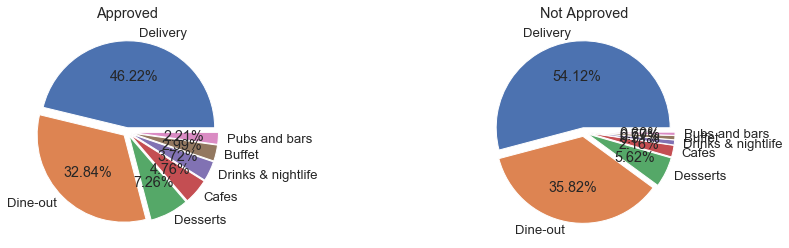

In [83]:
SelectedApprovedPie('listed_in(type)')

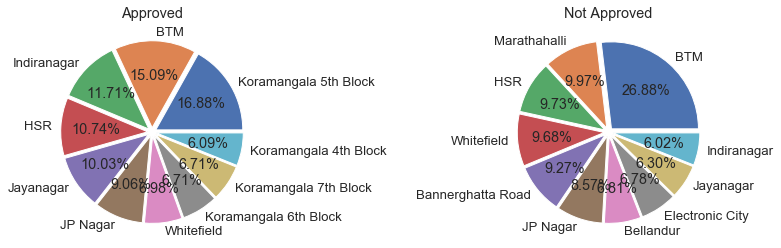

In [84]:
SelectedApprovedPie('location')

In [88]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'listed_in(type)', 'NumOfMenu', 'raw meats',
       ...
       'Repeated Word : amazing', 'Repeated Word : loved',
       'Repeated Word : love', 'Repeated Word : quite',
       'Repeated Word : recommend', 'Repeated Word : decent',
       'Repeated Word : perfect', 'Repeated Word : delicious',
       'num of cuisines', 'approx_cost'],
      dtype='object', length=129)

In [89]:
CatFeatures = ['name','location','rest_type', 'listed_in(type)']
data[CatFeatures]

,name,location,rest_type,listed_in(type)
0,Jalsa,Banashankari,Casual Dining,Buffet
1,Spice Elephant,Banashankari,Casual Dining,Buffet
2,San Churro Cafe,Banashankari,"Cafe, Casual Dining",Buffet
3,Addhuri Udupi Bhojana,Banashankari,Quick Bites,Buffet
4,Grand Village,Basavanagudi,Casual Dining,Buffet
...,...,...,...,...
41221,The Farm House Bar n Grill,Whitefield,"Casual Dining, Bar",Pubs and bars
41222,Bhagini,Whitefield,"Casual Dining, Bar",Pubs and bars
41223,Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,Bar,Pubs and bars
41224,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",Bar,Pubs and bars


In [90]:
from sklearn.preprocessing import LabelEncoder

def ApplyEncoder(OriginalColumn) : 
    global df
    Encoder = LabelEncoder()
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])
    

In [174]:
Encoder1 = LabelEncoder()
Encoder1.fit(df['location'])

Encoder2 = LabelEncoder()
Encoder2.fit(df['rest_type'])

Encoder3 = LabelEncoder()
Encoder3.fit(df['listed_in(type)'])

LabelEncoder()

In [181]:
Encoder1.transform(['JP Nagar'])

array([29], dtype=int64)

In [91]:
for col in CatFeatures : 
    df[f'Enc_{col}'] = ApplyEncoder(col)
df.head()    

,name,online_order,book_table,rate,votes,location,rest_type,listed_in(type),NumOfMenu,raw meats,healthy food,bihari,bubble tea,continental,coffee,south american,bbq,indian,american,arabian,jewish,bohri,malaysian,rolls,north eastern,kerala,south indian,korean,finger food,mexican,nepalese,afghan,wraps,juices,awadhi,seafood,german,drinks only,japanese,tex-mex,mangalorean,middle eastern,oriya,salad,hot dogs,bakery,tamil,lucknowi,tibetan,sindhi,indonesian,mongolian,ice cream,russian,andhra,goan,steak,belgian,pan asian,hyderabadi,lebanese,rajasthani,european,burger,street food,kashmiri,bar food,burmese,portuguese,sri lankan,fast food,north indian,desserts,kebab,australian,pizza,charcoal chicken,tea,konkan,assamese,iranian,spanish,cafe,biryani,sandwich,afghani,modern indian,italian,sushi,momos,vietnamese,naga,british,mithai,singaporean,beverages,french,greek,asian,bengali,chettinad,gujarati,mediterranean,cantonese,roast chicken,african,grill,paan,chinese,turkish,thai,parsi,maharashtrian,mughlai,vegan,Repeated Word : good,Repeated Word : great,Repeated Word : nice,Repeated Word : good.,Repeated Word : amazing,Repeated Word : loved,Repeated Word : love,Repeated Word : quite,Repeated Word : recommend,Repeated Word : decent,Repeated Word : perfect,Repeated Word : delicious,num of cuisines,approx_cost,Enc_name,Enc_location,Enc_rest_type,Enc_listed_in(type)
0,Jalsa,1,1,1,775,Banashankari,Casual Dining,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,1,0,3,800.0,2777,1,24,0
1,Spice Elephant,1,0,1,787,Banashankari,Casual Dining,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,3,800.0,5272,1,24,0
2,San Churro Cafe,1,0,1,918,Banashankari,"Cafe, Casual Dining",Buffet,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,3,800.0,4882,1,19,0
3,Addhuri Udupi Bhojana,0,0,1,88,Banashankari,Quick Bites,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,2,300.0,139,1,73,0
4,Grand Village,0,0,1,166,Basavanagudi,Casual Dining,Buffet,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,600.0,2247,4,24,0


In [172]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [92]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'listed_in(type)', 'NumOfMenu', 'raw meats',
       ...
       'Repeated Word : recommend', 'Repeated Word : decent',
       'Repeated Word : perfect', 'Repeated Word : delicious',
       'num of cuisines', 'approx_cost', 'Enc_name', 'Enc_location',
       'Enc_rest_type', 'Enc_listed_in(type)'],
      dtype='object', length=133)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [111]:
GaussianNBModel = GaussianNB()
MultinomialNBModel = MultinomialNB(alpha=1.0)
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33) 
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto') 
XGboost = XGBClassifier()
Models = [XGboost, GaussianNBModel,KNNClassifierModel,MultinomialNBModel,
          BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
          GBCModel,SGDClassifierModel,QDAModel,SVCModel,DecisionTreeClassifierModel]

In [108]:
from xgboost import XGBClassifier

In [102]:
x = df.drop(['rate','name','location','rest_type', 'listed_in(type)', ],axis=1)
y = df['rate']

In [189]:
x = df[['online_order','book_table','votes','approx_cost', 'Enc_location' ,'Enc_rest_type' ,'Enc_listed_in(type)','num of cuisines']]
x

,online_order,book_table,votes,approx_cost,Enc_location,Enc_rest_type,Enc_listed_in(type),num of cuisines
0,1,1,775,800.0,1,24,0,3
1,1,0,787,800.0,1,24,0,3
2,1,0,918,800.0,1,19,0,3
3,0,0,88,300.0,1,73,0,2
4,0,0,166,600.0,4,24,0,2
...,...,...,...,...,...,...,...,...
41221,0,0,34,800.0,88,25,6,2
41222,0,0,81,800.0,88,25,6,4
41223,0,0,27,1500.0,88,6,6,1
41224,0,1,236,2500.0,26,6,6,1


In [227]:
x.to_csv('xout.csv')
y.to_csv('yout.csv')

In [222]:
X_train,X_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.2 , random_state = 44 , shuffle = True)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32980, 8), (8246, 8), (32980,), (8246,))

In [218]:
ModelsScore = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')    


for Model XGBClassifier
Train Score is : 0.9201334141904184
Test Score is : 0.8934028619936939
Classification Report is : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3423
           1       0.91      0.91      0.91      4823

    accuracy                           0.89      8246
   macro avg       0.89      0.89      0.89      8246
weighted avg       0.89      0.89      0.89      8246

Precision value is  : 0.89
Recall value is  : 0.89
F1 Score value is  : 0.89
for Model GaussianNB
Train Score is : 0.6627653123104912
Test Score is : 0.6559544021343682
Classification Report is : 
               precision    recall  f1-score   support

           0       0.55      0.95      0.70      3423
           1       0.92      0.45      0.60      4823

    accuracy                           0.66      8246
   macro avg       0.74      0.70      0.65      8246
weighted avg       0.77      0.66      0.64      8246

Precision value is  : 0.

C:\Users\Mostafa Hesham\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Score is : 0.7519708914493632
Test Score is : 0.7566092650982295
Classification Report is : 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      3423
           1       0.82      0.75      0.78      4823

    accuracy                           0.76      8246
   macro avg       0.75      0.76      0.75      8246
weighted avg       0.76      0.76      0.76      8246

Precision value is  : 0.75
Recall value is  : 0.76
F1 Score value is  : 0.75
for Model RandomForestClassifier
Train Score is : 0.8044572468162523
Test Score is : 0.8087557603686636
Classification Report is : 
               precision    recall  f1-score   support

           0       0.87      0.64      0.73      3423
           1       0.78      0.93      0.85      4823

    accuracy                           0.81      8246
   macro avg       0.82      0.78      0.79      8246
weighted avg       0.82      0.81      0.80      8246

Precision value is  : 0.82
Recall va

C:\Users\Mostafa Hesham\anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Train Score is : 0.42874469375379015
Test Score is : 0.41765704584040747
Classification Report is : 
               precision    recall  f1-score   support

           0       0.42      0.99      0.59      3423
           1       0.66      0.01      0.02      4823

    accuracy                           0.42      8246
   macro avg       0.54      0.50      0.30      8246
weighted avg       0.56      0.42      0.25      8246

Precision value is  : 0.54
Recall value is  : 0.50
F1 Score value is  : 0.30
for Model DecisionTreeClassifier
Train Score is : 0.7882959369314736
Test Score is : 0.7962648556876061
Classification Report is : 
               precision    recall  f1-score   support

           0       0.86      0.61      0.71      3423
           1       0.77      0.93      0.84      4823

    accuracy                           0.80      8246
   macro avg       0.81      0.77      0.78      8246
weighted avg       0.81      0.80      0.79      8246

Precision value is  : 0.81
Recall 

In [219]:
ModelsScore

{'XGBClassifier': ['0.89', '0.89', '0.89'],
 'GaussianNB': ['0.74', '0.70', '0.65'],
 'KNeighborsClassifier': ['0.90', '0.90', '0.90'],
 'MultinomialNB': ['0.74', '0.71', '0.68'],
 'BernoulliNB': ['0.58', '0.57', '0.56'],
 'LogisticRegression': ['0.75', '0.76', '0.75'],
 'RandomForestClassifier': ['0.82', '0.78', '0.79'],
 'GradientBoostingClassifier': ['0.82', '0.80', '0.81'],
 'SGDClassifier': ['0.26', '0.27', '0.26'],
 'QuadraticDiscriminantAnalysis': ['0.74', '0.70', '0.65'],
 'SVC': ['0.54', '0.50', '0.30'],
 'DecisionTreeClassifier': ['0.81', '0.77', '0.78']}

In [224]:
ClassificationReport

'              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.88      3423\n           1       0.92      0.91      0.92      4823\n\n    accuracy                           0.90      8246\n   macro avg       0.90      0.90      0.90      8246\nweighted avg       0.90      0.90      0.90      8246\n'

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=10, scoring='accuracy', n_jobs=-1, verbose=3)

In [212]:
gs.fit(x , y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.1s finished


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions=[{'n_neighbors': range(5, 150, 2)}],
                   scoring='accuracy', verbose=3)

In [214]:
gs.best_params_

{'n_neighbors': 33}

In [215]:
model = gs.best_estimator_
model

KNeighborsClassifier(n_neighbors=33)

In [216]:
y_pred = model.predict(X_test)

In [225]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[3041  382]
 [ 425 4398]]


In [127]:
import joblib

In [226]:
joblib.dump(model, 'model.h5')

['model.h5']

In [175]:
joblib.dump(Encoder1, 'Encoder1.h5')

['Encoder1.h5']

In [176]:
joblib.dump(Encoder2, 'Encoder2.h5')

['Encoder2.h5']

In [177]:
joblib.dump(Encoder3, 'Encoder3.h5')

['Encoder3.h5']